**ID #1:** 316298876

**ID #2:** 316298256


# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
np.random.seed(0)

# Question 3.a

## Question 1

In [2]:
df_data = pd.read_csv("data.csv", skiprows=58, header=1, low_memory=False)

genes_n = df_data.shape[0] - 1
print(f'{genes_n} profiled genes')

54675 profiled genes


## Question 2

In [3]:
patients_n = df_data.shape[1] - 1
print(f'{patients_n} patients')

99 patients


In [4]:
classes = list(df_data.columns[1:])
print(classes)

['H', 'H.1', 'H.2', 'H.3', 'H.4', 'H.5', 'H.6', 'H.7', 'H.8', 'H.9', 'H.10', 'H.11', 'H.12', 'M', 'M.1', 'M.2', 'M.3', 'M.4', 'M.5', 'M.6', 'M.7', 'M.8', 'M.9', 'M.10', 'M.11', 'M.12', 'M.13', 'M.14', 'M.15', 'M.16', 'M.17', 'M.18', 'M.19', 'M.20', 'H.13', 'H.14', 'H.15', 'H.16', 'H.17', 'H.18', 'H.19', 'H.20', 'H.21', 'H.22', 'H.23', 'H.24', 'H.25', 'H.26', 'H.27', 'H.28', 'H.29', 'H.30', 'H.31', 'H.32', 'H.33', 'H.34', 'H.35', 'H.36', 'M.21', 'M.22', 'M.23', 'M.24', 'M.25', 'M.26', 'M.27', 'M.28', 'M.29', 'M.30', 'M.31', 'M.32', 'M.33', 'M.34', 'M.35', 'H.37', 'H.38', 'H.39', 'H.40', 'H.41', 'H.42', 'H.43', 'H.44', 'H.45', 'H.46', 'H.47', 'H.48', 'H.49', 'M.36', 'M.37', 'M.38', 'M.39', 'M.40', 'M.41', 'M.42', 'M.43', 'M.44', 'M.45', 'M.46', 'M.47', 'M.48']


In [5]:
df_data.head()

,Class,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,H.9,H.10,H.11,H.12,M,M.1,M.2,M.3,M.4,M.5,M.6,M.7,M.8,M.9,M.10,M.11,M.12,M.13,M.14,M.15,M.16,M.17,M.18,M.19,M.20,H.13,H.14,H.15,H.16,H.17,...,M.22,M.23,M.24,M.25,M.26,M.27,M.28,M.29,M.30,M.31,M.32,M.33,M.34,M.35,H.37,H.38,H.39,H.40,H.41,H.42,H.43,H.44,H.45,H.46,H.47,H.48,H.49,M.36,M.37,M.38,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
0,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,GSM1620829,GSM1620830,GSM1620831,GSM1620832,GSM1620833,GSM1620834,GSM1620835,GSM1620836,GSM1620837,GSM1620838,GSM1620839,GSM1620840,GSM1620841,GSM1620842,GSM1620843,GSM1620844,GSM1620845,GSM1620846,GSM1620847,GSM1620848,GSM1620849,GSM1620850,GSM1620851,GSM1620852,GSM1620853,GSM1620854,GSM1620855,GSM1620856,GSM1620857,...,GSM1620878,GSM1620879,GSM1620880,GSM1620881,GSM1620882,GSM1620883,GSM1620884,GSM1620885,GSM1620886,GSM1620887,GSM1620888,GSM1620889,GSM1620890,GSM1620891,GSM1620892,GSM1620893,GSM1620894,GSM1620895,GSM1620896,GSM1620897,GSM1620898,GSM1620899,GSM1620900,GSM1620901,GSM1620902,GSM1620903,GSM1620904,GSM1620905,GSM1620906,GSM1620907,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,5.984604923,6.444126136,4.919960058,5.511751997,5.663843103,4.562416458,5.237784412,5.310518957,5.249898632,5.5115008,4.949107666,5.15158282,5.126908181,5.539606881,5.283399432,5.288731919,6.555454506,5.566308023,5.765327282,5.138168169,6.13588372,5.421968309,6.163869441,6.061935785,6.837306739,5.226222617,6.137944876,6.444286484,6.691462908,...,5.625816635,6.622018947,5.60617754,5.623932093,5.144285645,5.669552921,5.518466028,5.052428251,5.003858141,6.162638582,6.17393294,5.601771579,7.522880565,5.344028996,5.420405456,6.644434374,5.831682526,6.726176315,5.653633195,5.978694924,6.242491268,5.296551574,5.547582561,5.916522943,5.889478152,6.195676155,6.112345496,5.432319923,4.71270991,5.266184645,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,7.552293801,8.158129288,7.799660696,7.856591385,6.84961761,7.956047464,7.710326637,7.984930964,8.708723479,8.087233588,7.87213707,8.146643771,7.904486787,7.590671834,7.527726269,7.911499462,7.481720167,7.589782699,7.652969521,7.371917749,7.540214522,8.388447716,7.738484261,7.830074254,8.024727782,6.805195785,7.695904083,7.808027698,6.908924364,...,8.981583294,5.241894547,7.586670685,8.31690199,7.359245967,8.219956553,8.387229227,5.919230768,7.409555572,5.759000796,7.63174102,7.119643481,7.627191039,8.714694376,8.051429194,8.034722521,7.149726942,7.992437708,6.324309007,6.869008279,7.336013324,5.60679895,6.272012275,8.091684049,7.513029039,8.307556575,7.377022551,7.448598432,8.171620187,5.657304845,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,5.899590353,5.753603452,5.88034165,7.006409059,6.81882596,6.524126223,7.196083901,7.691033654,9.468659375,7.496835018,6.577697593,7.188135534,6.005948079,6.854797201,6.078463093,8.215252394,8.618610576,7.630854084,9.881015625,6.49423773,8.415817957,10.40662804,10.55390549,9.281038245,6.312273204,6.733494503,6.136813754,7.929139871,8.378924593,...,6.505866838,6.700616936,9.202061869,7.069372181,7.422027739,7.191427108,8.011480015,6.418589378,6.934743267,6.218757883,6.382497255,7.228285903,8.901739877,7.504153791,6.683245768,7.046562119,7.024473709,6.5390767,6.016342049,6.249161999,7.014301872,7.080036097,6.157005169,6.285221624,7.039645711,6.815898452,7.081594885,6.803709325,6.645631155,6.4

## Question 3

In [6]:
classes = str.join(" ", list(df_data.columns[1:]))
print(re.findall("H[0-9]*", classes))
class_h_count = len(re.findall("H[0-9]*", classes))
class_m_count = len(re.findall("M[0-9]*", classes))
print(f'{class_h_count} Healthy & {class_m_count} Sick')

['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
50 Healthy & 49 Sick


## Question 4

In [7]:
df_data.dropna(inplace=True)

genes_n = df_data.shape[0] - 1
print(f'{genes_n} profiled genes')

54628 profiled genes


## Question 5

In [8]:
df_cols_sorted = df_data.reindex(sorted(df_data.columns), axis=1)

df_healthy = df_cols_sorted[df_cols_sorted.columns[1: class_h_count + 1]]
df_sick = df_cols_sorted[df_cols_sorted.columns[class_h_count + 1:]]

genes_k = 20
random_genes = np.random.choice(np.arange(1, genes_n, 1), genes_k)

df_healthy2 = df_healthy.iloc[random_genes].astype(float)
df_sick2 = df_sick.iloc[random_genes].astype(float)

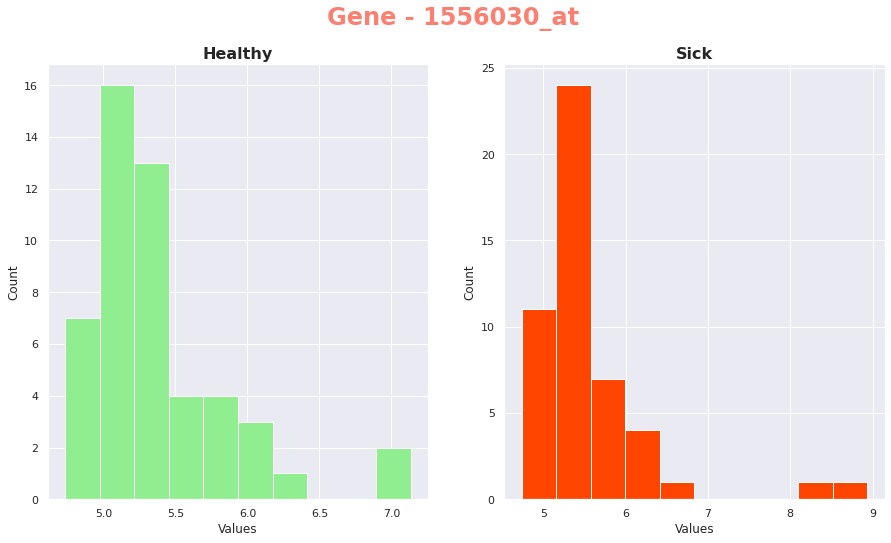

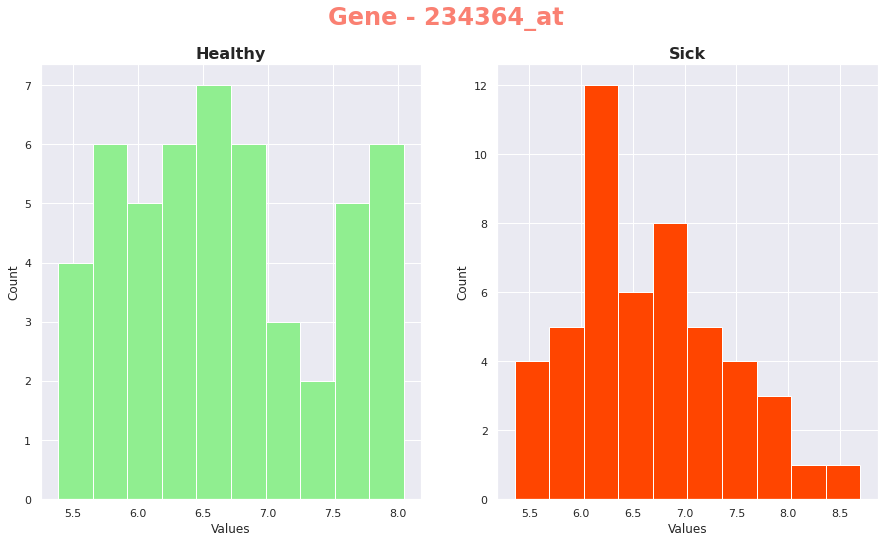

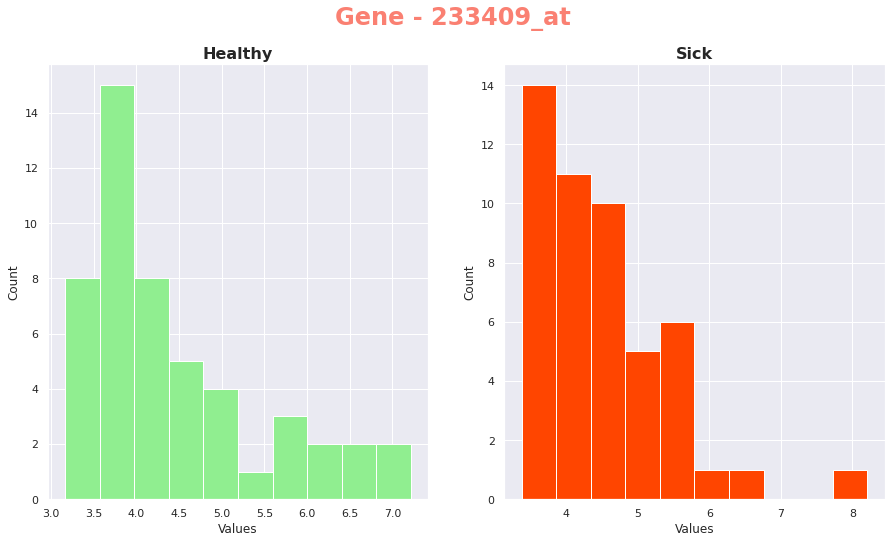

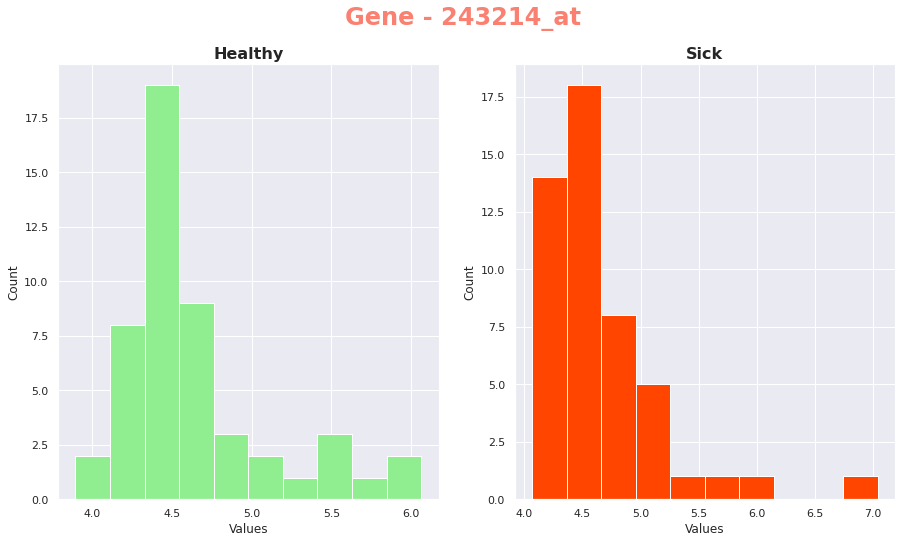

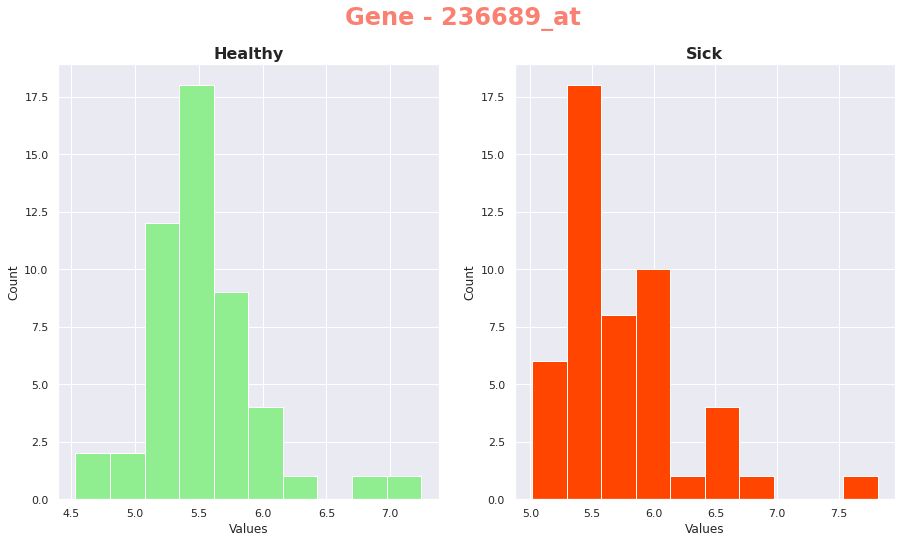

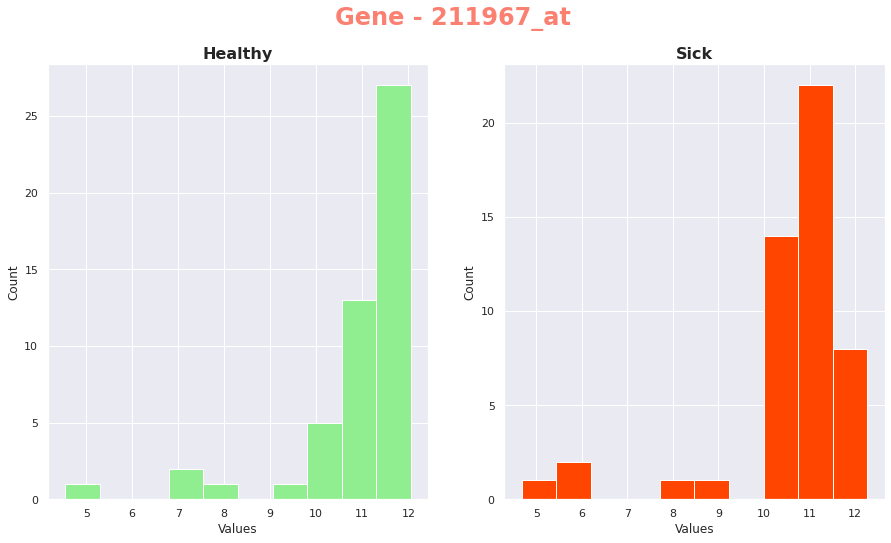

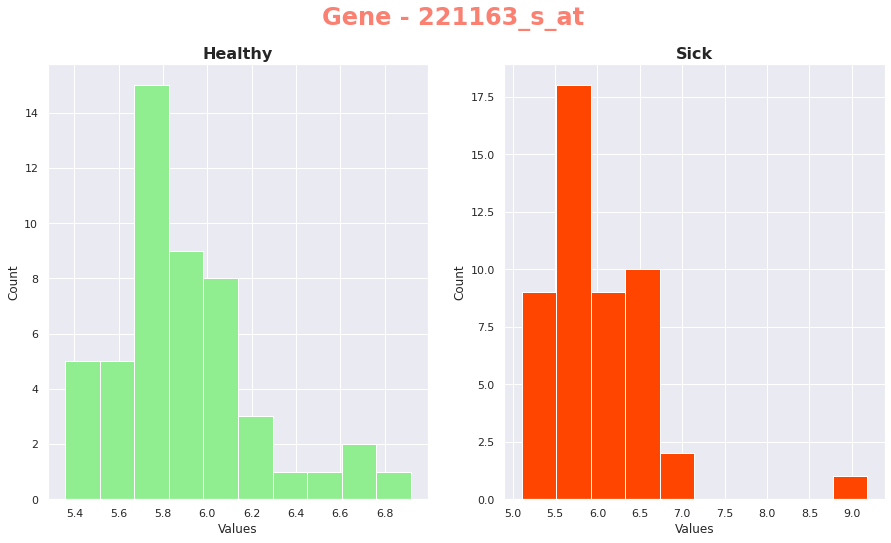

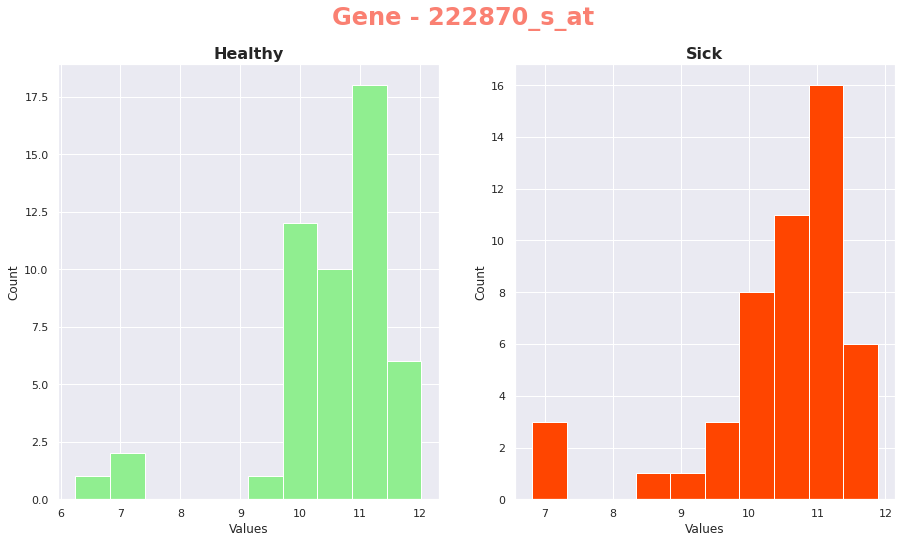

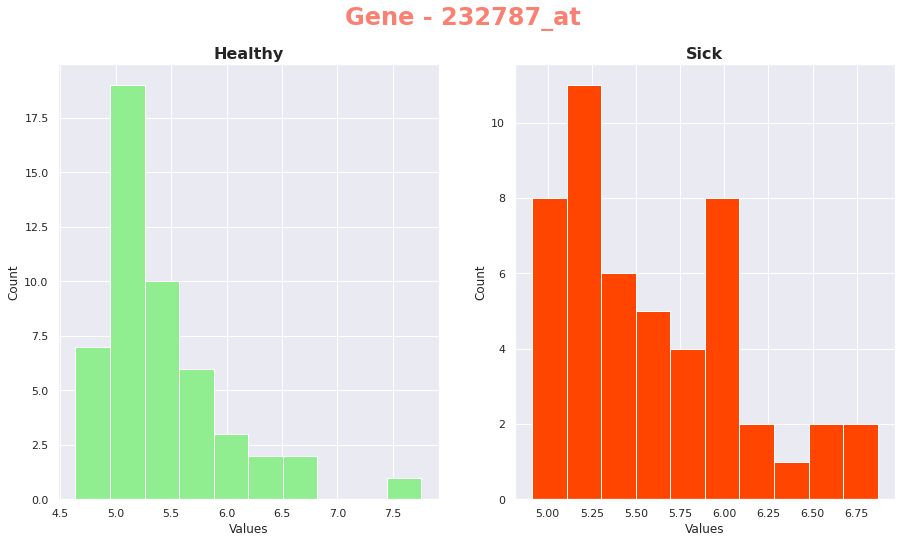

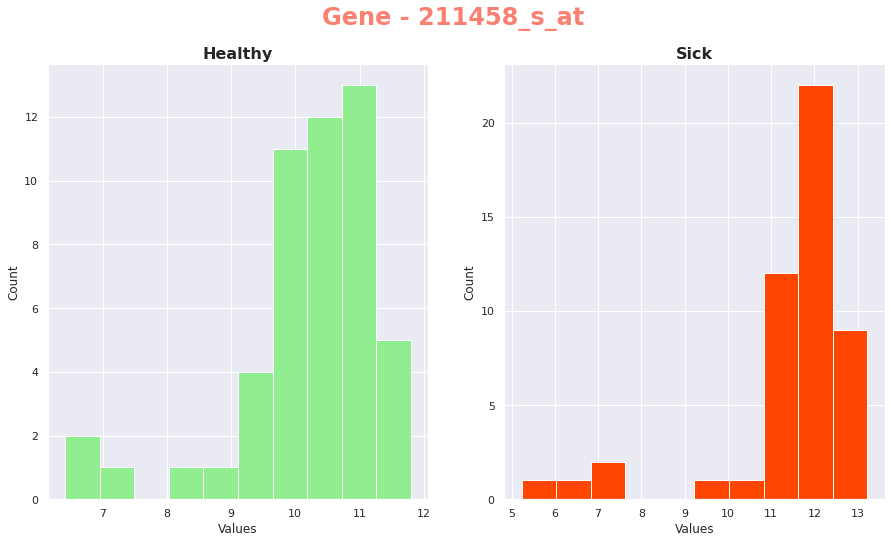

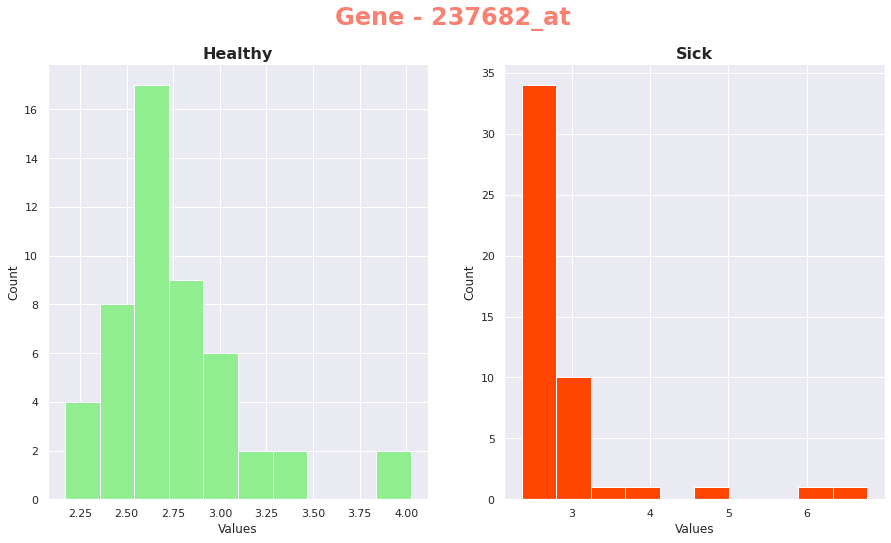

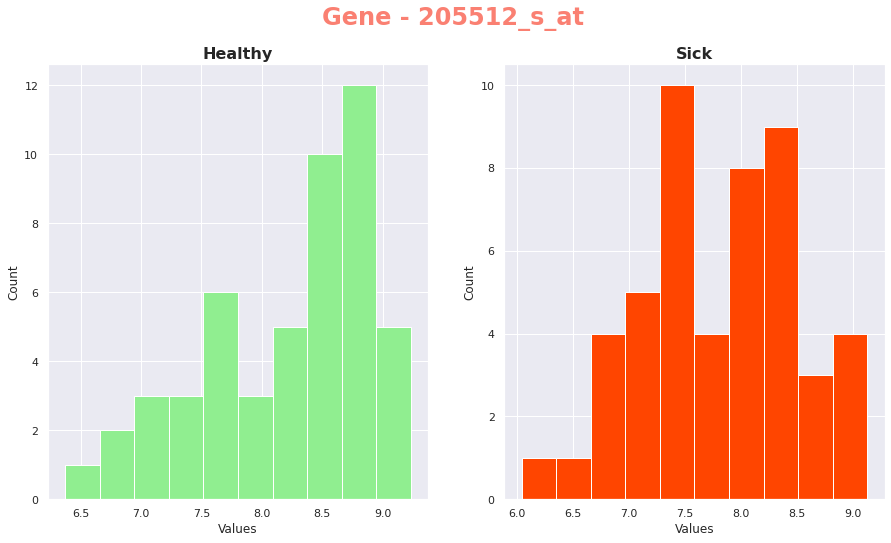

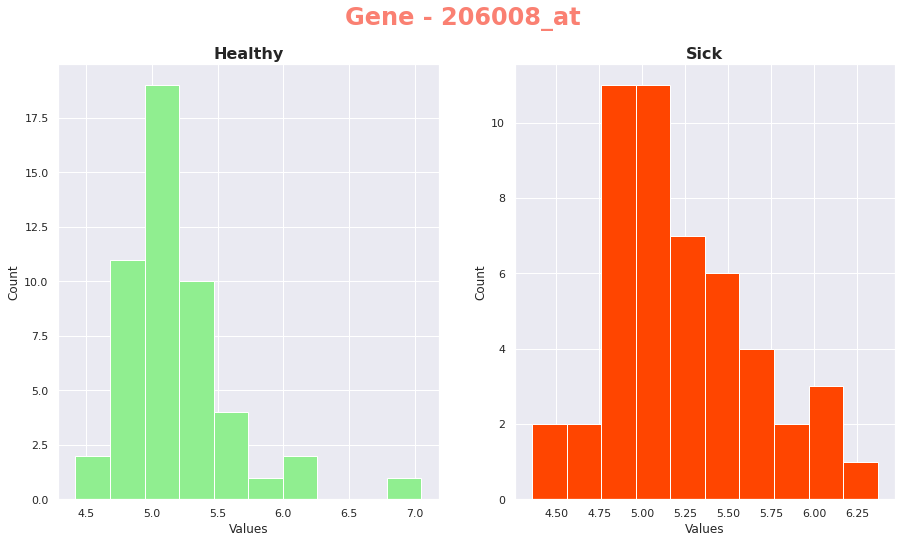

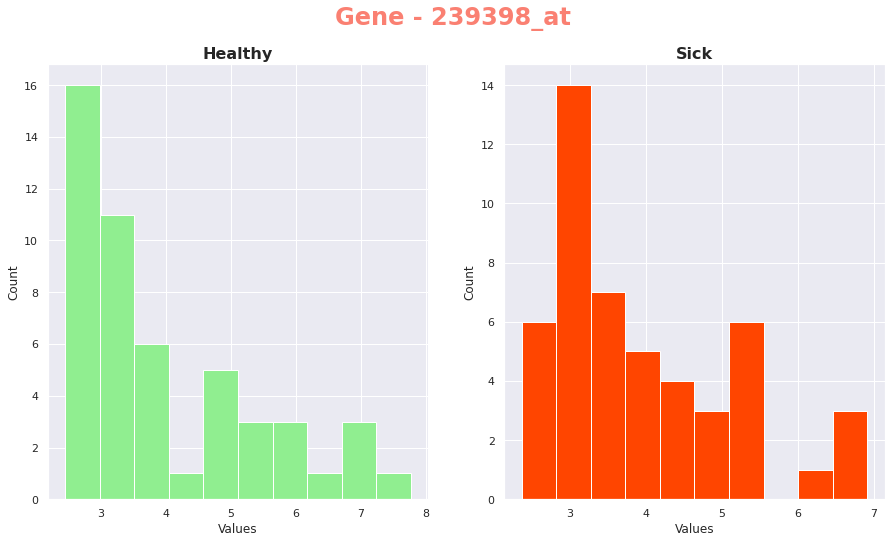

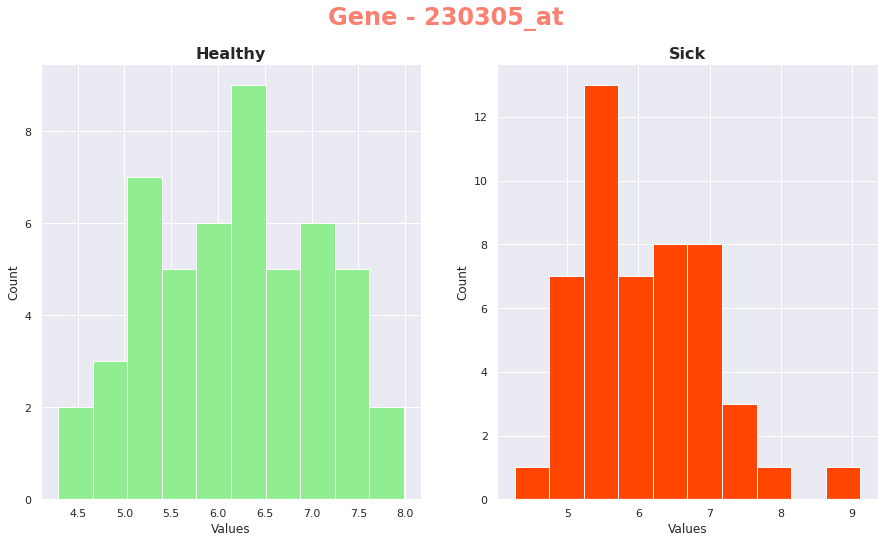

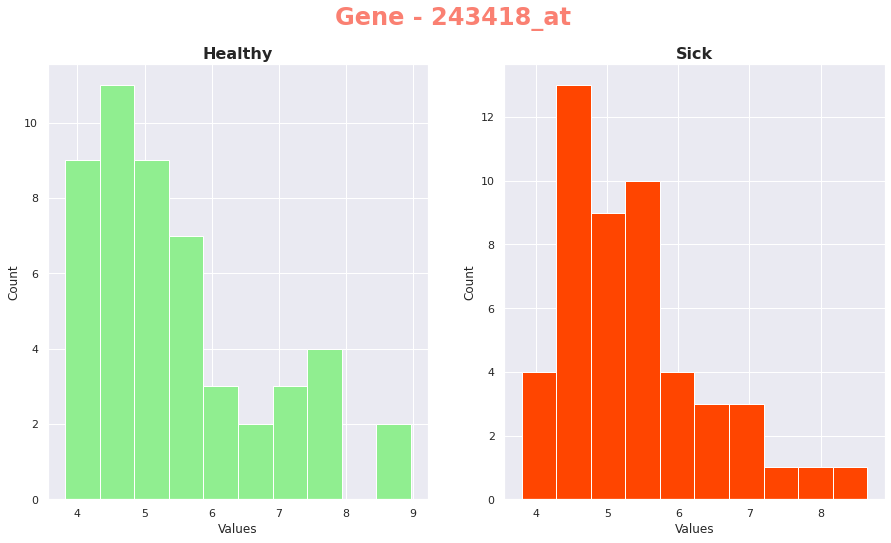

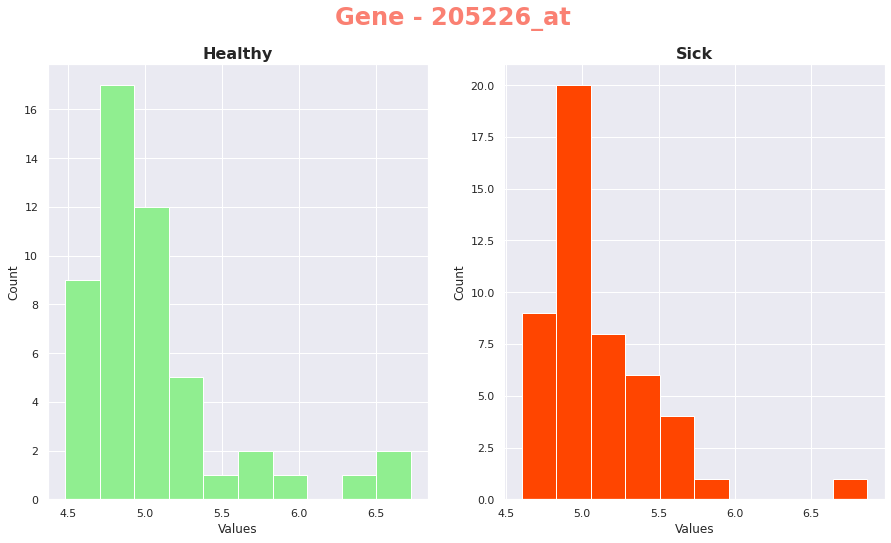

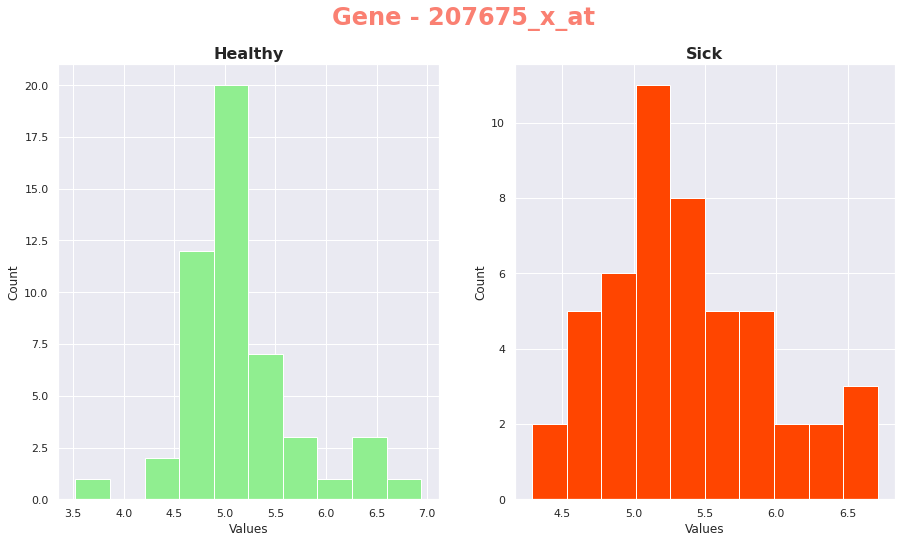

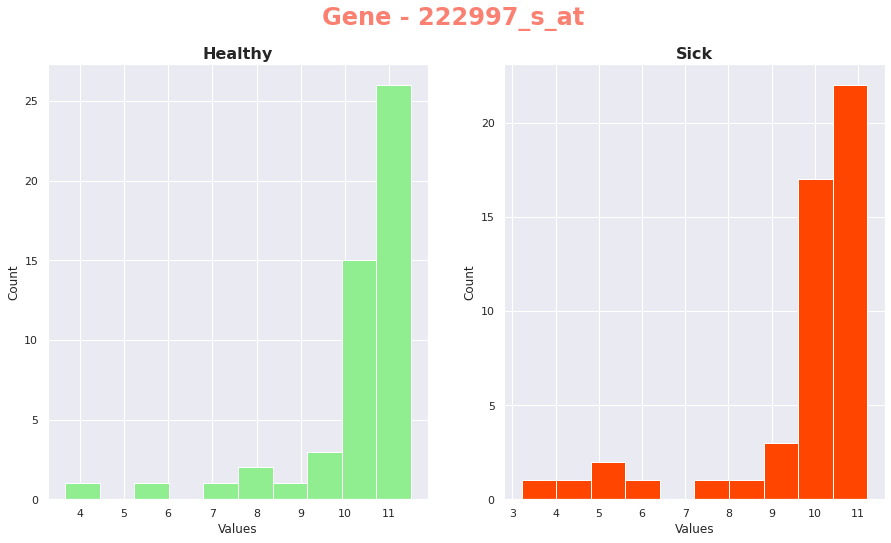

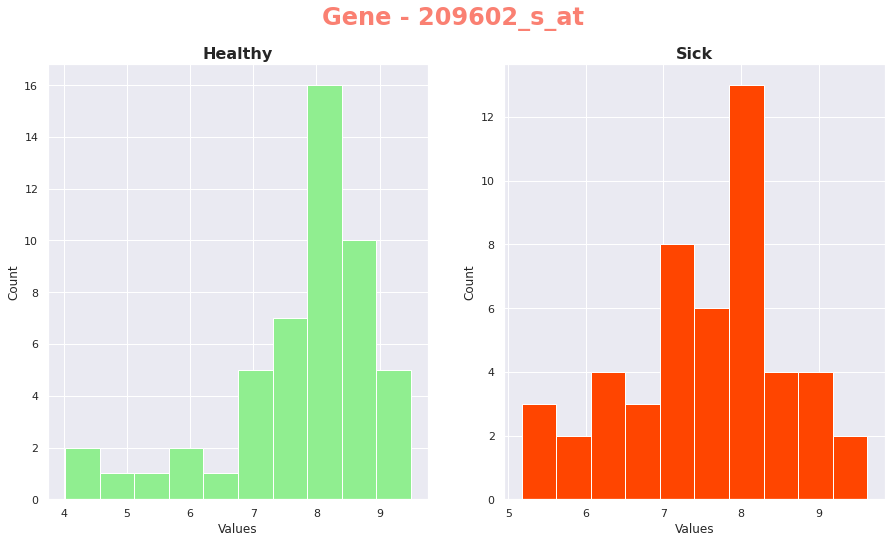

In [9]:
for g_idx in range(random_genes.shape[0]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Gene - {df_data.iloc[random_genes[g_idx]]["Class"]}', fontsize=24, color='salmon', weight='bold')
    fig.set_size_inches(15, 8)

    ax1: plt.Axes = ax1
    ax2: plt.Axes = ax2

    ax1.hist(df_healthy2.iloc[g_idx], color='lightgreen')
    ax1.set_title("Healthy", fontsize=16, weight='bold')
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Count")

    ax2.hist(df_sick2.iloc[g_idx], color='orangered')
    ax2.set_title("Sick", fontsize=16, weight='bold')
    ax2.set_xlabel("Values")
    ax2.set_ylabel("Count")


    plt.show()

# Question 3.b

In [10]:
random_idx = np.random.choice(np.arange(1, genes_n, 1), 1)[0]
wrs_healthy: pd.Series = df_healthy.iloc[random_idx]
wrs_sick: pd.Series = df_sick.iloc[random_idx]

df_wrs = pd.concat([
    pd.DataFrame({'data': wrs_healthy.astype(float), 'label': 0}),
    pd.DataFrame({'data': wrs_sick.astype(float), 'label': 1})
])

df_wrs.sort_values(by='data', ascending=False, inplace=True)
df_wrs['index'] = np.arange(1, df_wrs.shape[0] + 1, 1)
df_label_1: pd.DataFrame = df_wrs[df_wrs['label'] == 1]

B = df_label_1['label'].sum(axis=0)
N = df_wrs.shape[0]

print(df_label_1['label'].sum(axis=0))

49


## Question 1

In [11]:
print(f'E = [B * (N + 1)] / 2 = [{B} * ({N} + 1)] / 2 = {int((B * (N + 1)) / 2)}')

E = [B * (N + 1)] / 2 = [49 * (99 + 1)] / 2 = 2450


## Question 2

In [12]:
print(f'RS(g) = c = [49 * (51 + 99)] / 2 = {int((49 * (51 + 99)) / 2)}')

RS(g) = c = [49 * (51 + 99)] / 2 = 3675


$c = RS(g) = 3675$

## Question 3

In [13]:
print(f'P(RS(g) = c) = 1 / 99C49')

P(RS(g) = c) = 1 / 99C49


$P(RS(g)) = c) = \frac{1}{99 \choose 49}$

## Question 4

$P(RS(g) = c-1 ) = P(RS(g) = c) = \frac {|M|!}{{N \choose |M|} |M|!} = \frac {1}{{N \choose |M|}} = \frac {1}{{99 \choose 49}}$

$P(RS(g) = c-2 ) = \frac {2 \cdot |M|!}{{N \choose |M|} |M|!} = \frac {2}{{N \choose |M|}} = \frac {2}{{99 \choose 49}}$

## Question 5

In [14]:
def rs_gene(gene):
    df_wrs = pd.concat([
        pd.DataFrame({'data': gene[0:class_h_count].astype(float), 'label': 0}),
        pd.DataFrame({'data': gene[class_h_count:].astype(float), 'label': 1})
    ])

    df_wrs.sort_values(by='data', ascending=False, inplace=True)
    df_wrs['index'] = np.arange(1, df_wrs.shape[0] + 1, 1)
    df_label_1: pd.DataFrame = df_wrs[df_wrs['label'] == 1]

    return df_label_1['index'].sum(axis=0)


df_cleaned = df_cols_sorted.drop(['Class'], axis=1).drop([0], axis=0)
result = df_cleaned.apply(rs_gene, axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


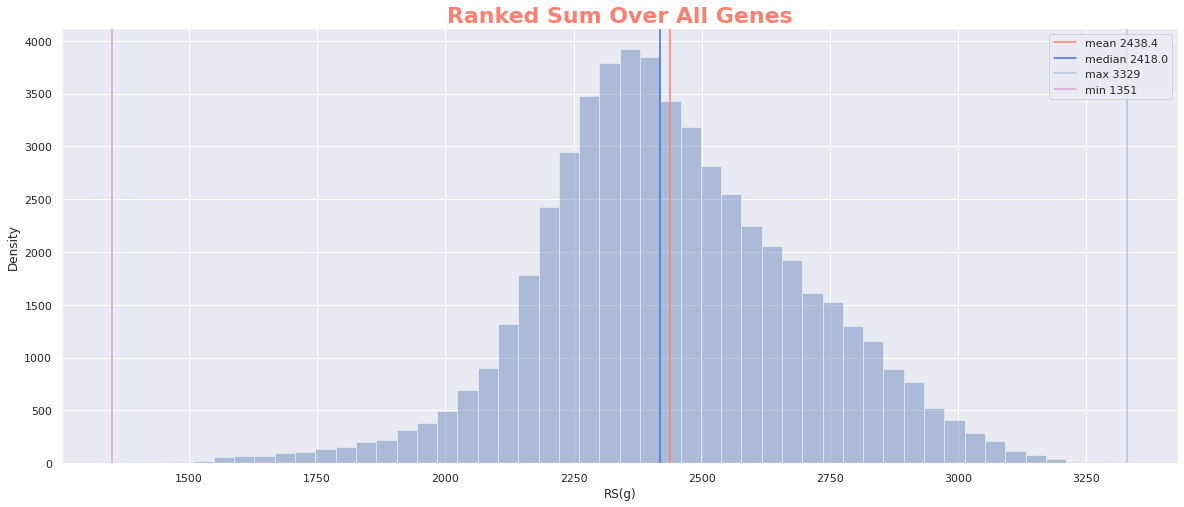

In [15]:
plt.figure(figsize=(20, 8))
sns.distplot(result, kde=False)

plt.title("Ranked Sum Over All Genes", fontsize=22, color='salmon', weight='bold')
plt.ylabel("Density")
plt.xlabel("RS(g)")

plt.axvline(result.mean(), label="mean {:0.1f}".format(result.mean()), color="salmon")
plt.axvline(result.median(), label="median {:0.1f}".format(result.median()), color="royalblue")
plt.axvline(result.max(), label="max {}".format(result.max()), color="lightsteelblue")
plt.axvline(result.min(), label="min {}".format(result.min()), color='plum')

plt.legend()
plt.show()

In [16]:
q1 = np.percentile(result, 25)
q3 = np.percentile(result, 75)

print(f'IQR = {q3 - q1}')

IQR = 329.0


# Question 3.c

In [17]:
_df = pd.read_csv("data.csv", skiprows=59, header=None, low_memory=False).T

cols = _df.iloc[0]

_df = _df[1:]
_df.columns = cols

In [18]:
alpha = 0.07

M_instances = _df['Class'] == 'M'
H_instances = _df['Class'] == 'H'

In [19]:
def calc_t_test(r):
    return stats.ttest_ind(r[M_instances].astype('float'), r[H_instances].astype('float'), equal_var = False)

df_t_test = _df.iloc[:,2:].apply(calc_t_test, axis=0, result_type='expand')
df_t_test.index=['t-statistic', 'p-value']

In [20]:
t_test_values = df_t_test.T['t-statistic']
t_test_p_values = df_t_test.T['p-value'] / 2.0

df_overexpressed_genes_t_test = df_t_test.T[(t_test_values > 0) & (t_test_p_values < alpha)]
df_underexpressed_genes_t_test = df_t_test.T[(t_test_values <= 0) & (t_test_p_values < alpha)]

In [21]:
print(f'T-Test overexpressed genes - M against H = {df_overexpressed_genes_t_test.shape[0]}')
print(f'T-Test underexpressed genes - M against H = {df_underexpressed_genes_t_test.shape[0]}')

T-Test overexpressed genes - M against H = 8489
T-Test underexpressed genes - M against H = 8634


In [22]:
def calc_wrs(r):
    return stats.ranksums(r[M_instances].astype('float'), r[H_instances].astype('float'))

df_wrs = _df.iloc[:,2:].apply(calc_wrs, axis=0, result_type='expand')
df_wrs.index=['t-statistic', 'p-value']

In [23]:
wrs_values = df_wrs.T['t-statistic']
wrs_p_values = df_wrs.T['p-value'] / 2.0

df_overexpressed_genes_wrs = df_wrs.T[(wrs_values > 0) & (wrs_p_values < alpha)]
df_underexpressed_genes_wrs = df_wrs.T[(wrs_values <= 0) & (wrs_p_values < alpha)]

In [24]:
print(f'WRS overexpressed genes - M against H = {df_overexpressed_genes_wrs.shape[0]}')
print(f'WRS underexpressed genes - M against H = {df_underexpressed_genes_wrs.shape[0]}')

WRS overexpressed genes - M against H = 10800
WRS underexpressed genes - M against H = 10673


# Question 3.d

In [25]:
n = 80

df_over_significant = df_overexpressed_genes_wrs.sort_values(by='p-value')[:n]
df_under_significant = df_underexpressed_genes_wrs.sort_values(by='p-value')[:n]

D = pd.concat((df_over_significant, df_under_significant))
df_D = _df[D.index].astype('float')

## Question 1

In [26]:
df_D_kendall_correlations = df_D.corr(method='kendall')

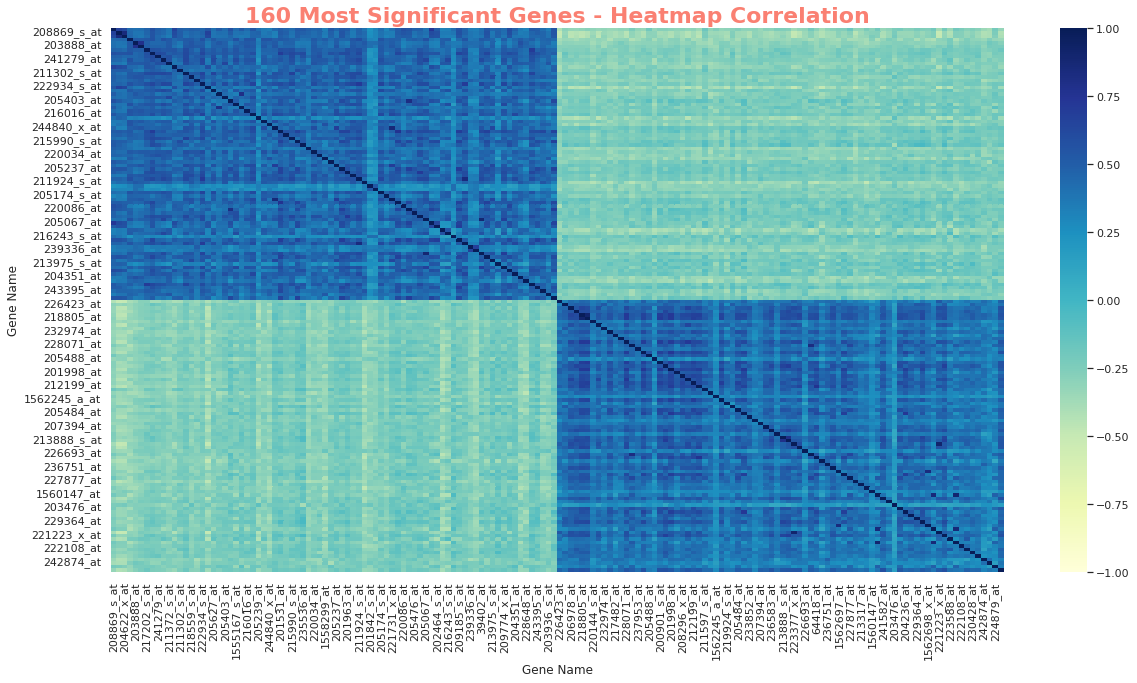

In [27]:
plt.figure(figsize = (20,10))

sns.heatmap(df_D_kendall_correlations, cmap= 'YlGnBu', vmin=-1, vmax=1)

plt.title(f'160 Most Significant Genes - Heatmap Correlation', fontsize=22, color='salmon', weight='bold')
plt.xlabel('Gene Name')
plt.ylabel('Gene Name')

plt.show()

## Question 2

In [28]:
ken_m = df_D_kendall_correlations.mean()

print(round(np.mean(ken_m), 5))

0.09016


## Question 3

As we can see, there is positive co-expression with the most overexpressed genes & with the most underexpressed genes means that for people with a overexpressed gene, other gene is less overexpressed (same goes for underexpressed genes).

We can see also that the coexpression between overexpressed and underexpressed genes is negative!


## Question 4

In [29]:
nu = df_t_test.T['p-value'] * df_t_test.T['p-value'].size
de = df_t_test.T['p-value'].rank()

res = nu / de

alpha = 0.05
print(f'Using the T-TEST & FDR = 0.05 we can see {res[res <=  0.05].count()} genes.')

Using the T-TEST & FDR = 0.05 we can see 3905 genes.


## Question 5

The big advantage that's come with this solution is that we don't need to calculate every possible pair (540K ^ 2 is couple billions of pairs...), we achieving this by calculating only over/under expressed genes.

This advantage is also disadvantage because mabye we missing interesting pairs.

## Question 6

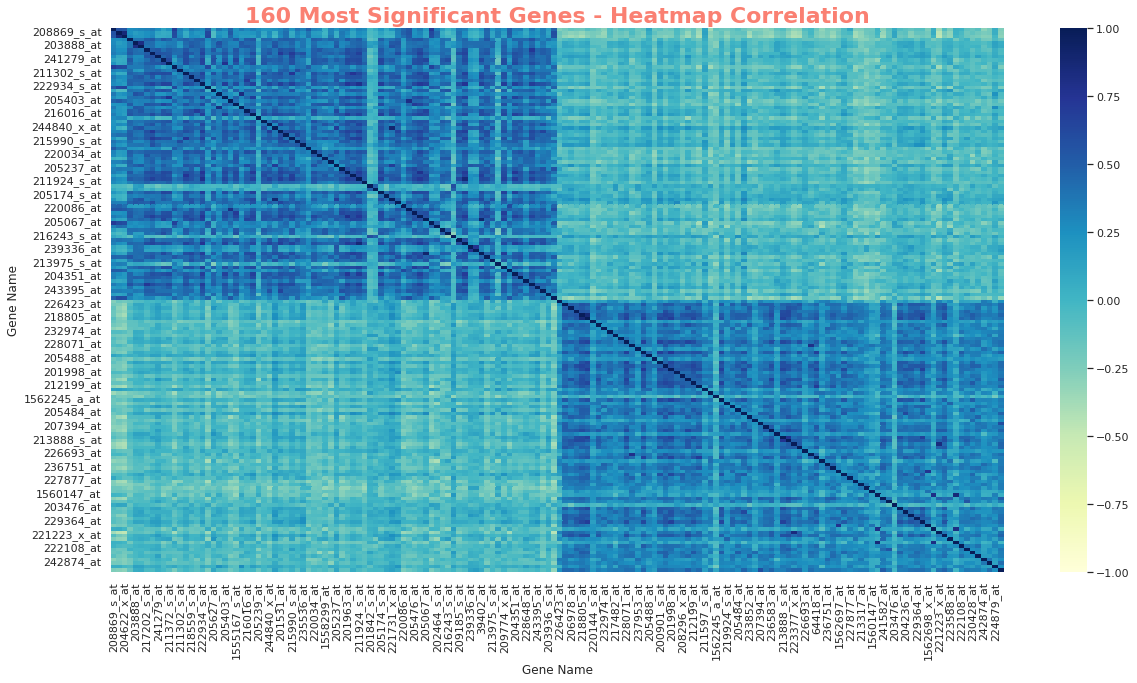

In [30]:
_df = df_D[M_instances].corr(method='kendall')

plt.figure(figsize = (20,10))
sns.heatmap(_df, cmap= 'YlGnBu', vmin=-1, vmax=1)

plt.title(f'160 Most Significant Genes - Heatmap Correlation', fontsize=22, color='salmon', weight='bold')
plt.xlabel('Gene Name')
plt.ylabel('Gene Name')

plt.show()

# Question 3.e

## Question 1

In [31]:
def calc_DE_overabundance(df_statistic: pd.DataFrame, test: str):
    plt.rcParams["figure.figsize"] = (20,10)
    genes_n = df_statistic.shape[0]
    df_overabundance = df_statistic.copy()

    df_overabundance['t-statistic'] = df_overabundance['t-statistic'].abs()

    df_overabundance['expected'] = df_overabundance['p-value'] * genes_n
    df_overabundance['actual'] = df_overabundance['t-statistic'].rank(ascending = False)   
    
    ax = df_overabundance[['expected', 'actual', 'p-value']]
    ax = ax.sort_values(by='p-value').plot(x='p-value')
    
    ax.set_title(f'{test} overabundance', fontsize=22, color='salmon', weight='bold')

    plt.ylabel('number of genes')
    
    ax.set_xscale('log')

    plt.show()

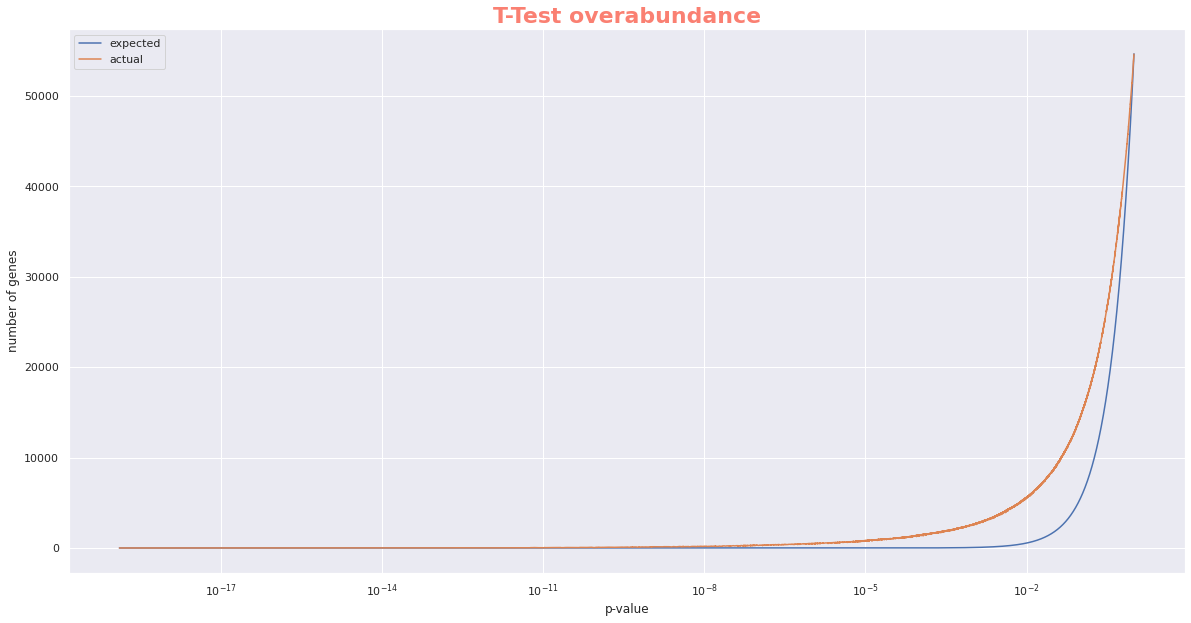

In [32]:
calc_DE_overabundance(df_t_test.T, 'T-Test')

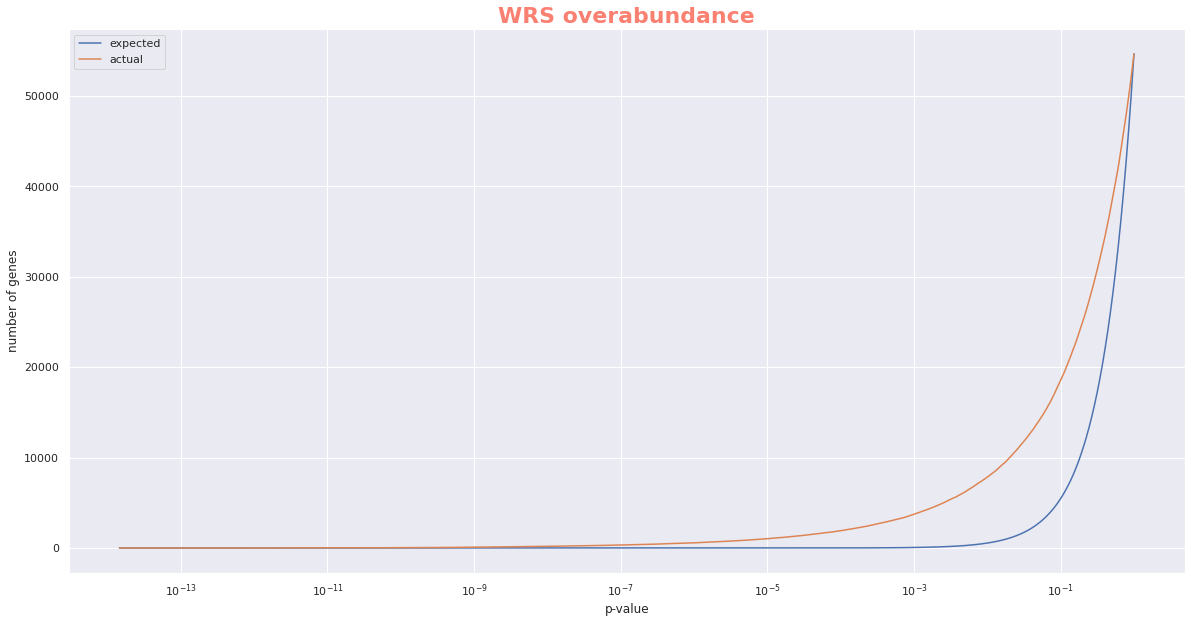

In [33]:
calc_DE_overabundance(df_wrs.T, 'WRS')

## Question 2

In [34]:
def calc_FDR(_df: pd.DataFrame, test: str):
    vals = [0.05, 0.01, 0.005]

    nu = _df['p-value'] * _df['p-value'].size
    de = _df['p-value'].rank()
    res = nu / de
    
    for fdr in vals:
        print(f'Using the {test} & FDR = {fdr} we can see {res[res <=  fdr].count()} genes.')

In [35]:
calc_FDR(_df=df_t_test.T, test='T-Test')
print('!------------------------------------------------------!')
calc_FDR(df_wrs.T, 'WRS')

Using the T-Test & FDR = 0.05 we can see 3905 genes.
Using the T-Test & FDR = 0.01 we can see 1947 genes.
Using the T-Test & FDR = 0.005 we can see 1545 genes.
!------------------------------------------------------!
Using the WRS & FDR = 0.05 we can see 6684 genes.
Using the WRS & FDR = 0.01 we can see 3172 genes.
Using the WRS & FDR = 0.005 we can see 2379 genes.


In [36]:
def plot_expression_patterns(gene):
    sns.kdeplot(gene.iloc[np.where(M_instances)], shade=True, label='M')
    sns.kdeplot(gene.iloc[np.where(H_instances)], shade=True, label='H')

    plt.title(gene.name, fontsize=22, color='salmon', weight='bold')

    plt.xlabel('DE')
    plt.ylabel('Density')

    plt.legend()
    plt.show()

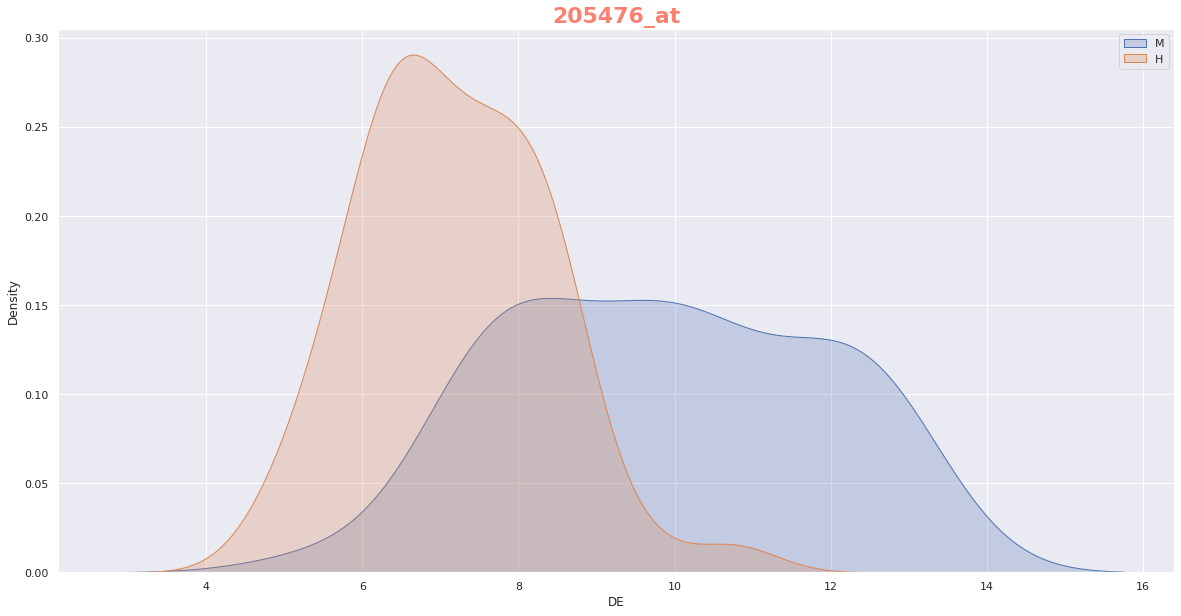

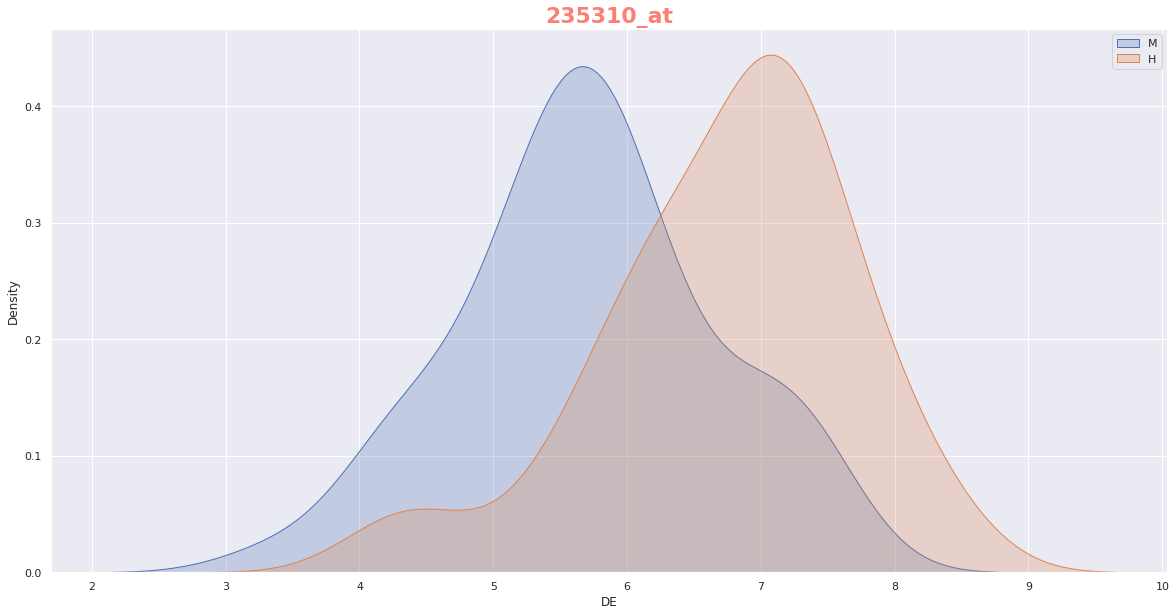

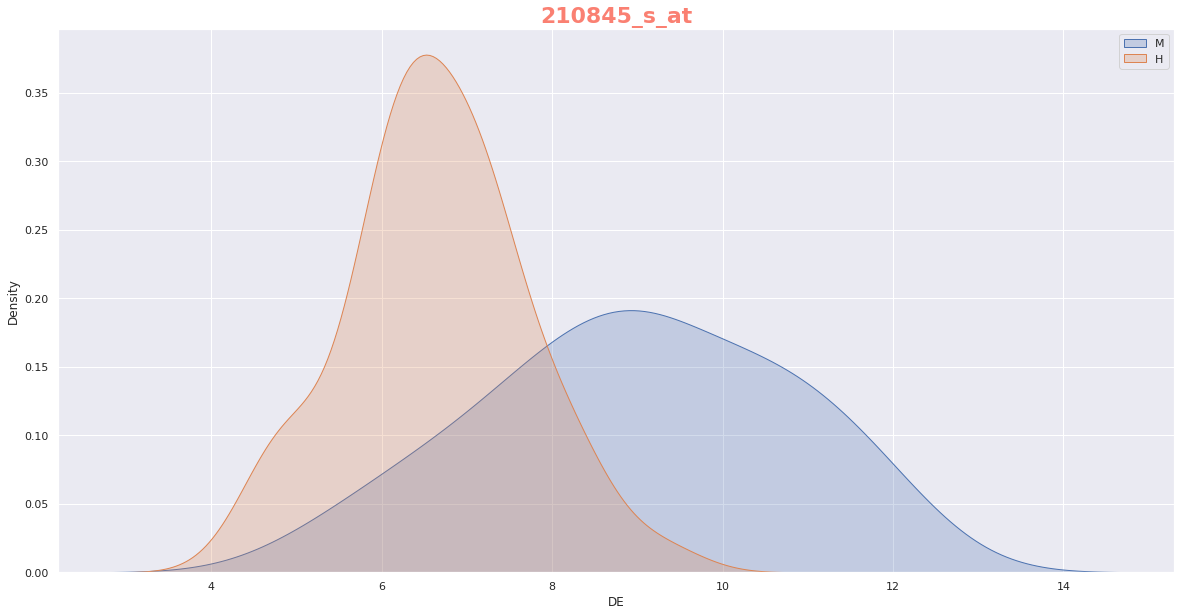

0
205476_at      None
235310_at      None
210845_s_at    None
dtype: object

In [37]:
D_sample = D.sample(n=3)

_df_data = df_data.set_index('Class')

D_sample = _df_data.loc[D_sample.index].T
D_sample.reset_index(drop=True, inplace=True)
D_sample = D_sample.astype('float')

D_sample.apply(plot_expression_patterns, axis=0)

## Question 3

In [83]:
df_heatmap = df_data[1:]

In [84]:
true_vals = df_heatmap['Class'].isin(list(D.index))
df_heatmap = df_heatmap[true_vals]

df_heatmap.rename(columns={'Class': 'Gene'}, inplace=True)
df_heatmap.set_index('Gene', inplace=True)
df_heatmap = df_heatmap.T.astype(float)
df_heatmap.index.names = ['Class']
df_heatmap = df_heatmap.sort_index().T

In [85]:
genes_order = D.sort_values(by=['t-statistic'])

In [86]:
df_heatmap = df_heatmap.reindex(index=list(genes_order.index))
df_heatmap.head()

Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,H.16,H.17,H.18,H.19,H.2,H.20,H.21,H.22,H.23,H.24,H.25,H.26,H.27,H.28,H.29,H.3,H.30,H.31,H.32,H.33,H.34,H.35,H.36,H.37,H.38,H.39,H.4,H.40,H.41,H.42,H.43,H.44,...,M.17,M.18,M.19,M.2,M.20,M.21,M.22,M.23,M.24,M.25,M.26,M.27,M.28,M.29,M.3,M.30,M.31,M.32,M.33,M.34,M.35,M.36,M.37,M.38,M.39,M.4,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
226423_at,8.096526,7.204572,6.595071,6.543012,7.217521,8.334713,7.305485,8.424071,8.146224,6.999132,7.133598,7.884756,6.143440,7.565486,7.445429,7.585937,7.845192,9.002342,7.427513,8.174996,7.349526,7.398509,7.959364,8.031724,8.720321,8.141194,7.106365,6.700815,8.288259,7.336809,7.801335,6.735745,7.410381,5.125628,7.237945,6.922052,5.709736,6.931211,7.324113,6.346617,...,7.326819,7.195013,7.051483,5.284998,6.866668,7.043826,6.907647,7.301331,5.757948,6.948778,6.124161,6.745908,6.624112,5.384431,6.074613,6.703915,6.640305,5.880335,6.496249,5.496237,6.230507,5.857636,5.085280,6.632242,5.246430,6.180049,6.512634,7.324613,5.843145,5.468881,4.819285,6.161099,5.293419,7.521144,6.985338,5.847592,5.543240,5.277372,6.396657,6.464573
234095_at,10.267619,10.744297,9.705387,10.517911,10.111371,9.969582,10.399831,9.789709,10.377456,10.516007,10.078164,10.071490,9.984065,9.868703,10.046239,9.828623,9.933436,10.266477,9.835932,9.735519,8.334646,9.915016,9.083397,10.483771,9.548271,9.487973,9.379637,9.341341,9.425532,9.439718,10.254805,9.824482,9.402835,8.745591,10.426588,9.070523,10.551205,10.615897,9.978818,7.213135,...,10.521708,8.693468,9.792338,8.294668,9.492724,7.713714,7.155921,8.577296,7.765388,8.263336,8.989825,7.599997,8.538112,7.428584,10.059185,8.880865,8.340668,7.008330,5.843759,7.099655,7.762742,6.232960,4.698349,9.352456,9.227003,9.564276,8.803181,8.735389,7.697609,6.117808,7.635899,6.758414,6.010530,9.343903,7.674686,9.736212,8.923304,8.401196,10.247494,10.577165
206978_at,11.162685,10.607600,9.621719,10.698052,11.140637,11.159312,10.790419,11.516339,10.569705,10.581778,10.987275,10.808267,9.918341,10.943834,10.666901,10.750869,11.334323,11.546676,11.156100,11.476667,11.324826,11.430614,11.258562,11.599957,10.617502,11.716020,9.489186,10.820291,11.543672,11.490938,11.102211,5.721362,11.197884,7.644975,10.057829,7.024457,10.980702,10.360828,10.414499,7.479018,...,10.339341,10.445840,9.898202,8.162347,9.349297,8.612230,7.101359,6.577574,7.689837,3.852151,8.284622,5.319256,6.625116,8.782855,9.078899,6.557986,6.083065,9.164349,4.505067,5.626813,8.025484,8.266982,6.908401,9.174143,7.987843,11.317455,7.669913,5.242480,5.178211,8.011860,7.502898,7.619756,4.178306,8.252575,8.899091,11.501272,8.442811,8.189246,10.292262,10.850360
243458_at,10.156025,10.582102,10.199777,10.133908,10.244031,10.983370,10.056036,10.409495,10.100719,10.715949,10.505724,10.030539,9.831265,10.496805,10.260062,9.829350,9.807725,10.486911,9.895642,9.428729,10.015789,10.557669,10.076138,10.635624,9.814817,10.267023,7.906130,9.783702,10.653087,10.339720,9.768779,8.952403,9.647839,5.231066,10.306822,6.570113,9.074155,8.217542,9.867444,8.906152,...,9.637249,9.322346,9.409971,8.231107,9.028191,7.316406,7.325878,6.505089,7.584571,6.607380,6.308253,7.759569,8.283031,7.902508,10.008571,8.229120,7.722176,8.188959,6.447323,6.375098,7.419285,8.451074,5.943411,9.528084,6.900312,9.299648,8.545654,7.044752,8.615354,8.015828,7.656104,8.781724,8.375186,10.214691,8.285006,9.577473,8.621952,8.892336,9.968791,9.475996
218805_at,12.665831,12.697012,12.165455,11.996616,12.438932,12.658228,12.667413,12.516321,12.890505,12.872375,12.586019,12.721465,12.554381,12.724690,12.971756,12.731318,12.750991,12.994875,12.712162,12.912151,12.430213,13.118613,12.876684,12.723016,12.393213,12.960506,9.350740,12.583820,12.982706,12.783807,12.715423,10.334335,12.908411,6.684086,12.651866,11.077559,12.268456,12.270244,12.536937,6.088843,...,12.090857,11.764702,11.528497,9.926306,12.030648,6.615966,7.298334,10.220120,11.162189,9

Text(0.5, 84.5, 'Sample')

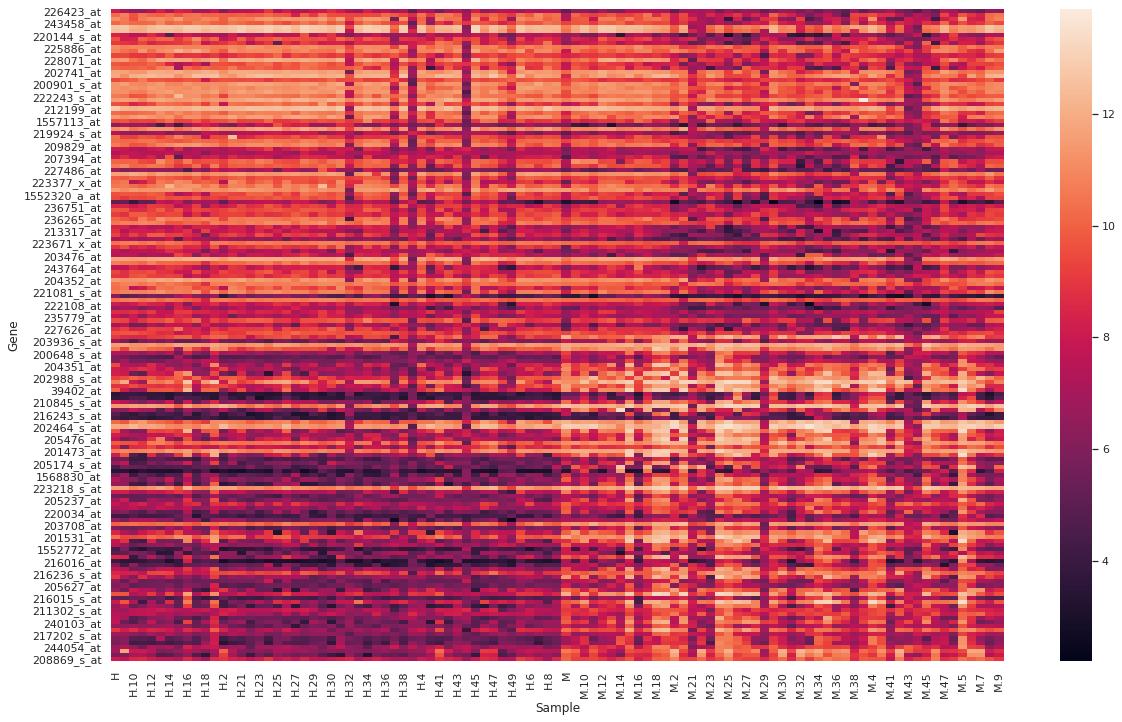

In [87]:
plt.figure(figsize = (20,12))

sns.heatmap(df_heatmap)

plt.ylabel("Gene")
plt.xlabel("Sample")